# Predikere overlevelse på Titanic

Vi har et datasett med informasjon om alle, eller de fleste passasjerene på Titanic, som sank i 1912, inkludert om personen overlevde ulykken eller ikke.

Vi vil se om vi kan bruke informasjonen vi har om passasjerene til å si om de overlevde.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Add parent directory to path so we can import from useful_tools
import sys
import os
sys.path.append(os.path.split(os.path.abspath(os.getcwd()))[0])
from useful_tools import ModelTester

# Datasettet finnes allerede i pakken Seaborn
titanic = sns.load_dataset('titanic', dtype={'age': np.float64})

titanic.adult_male = titanic.adult_male.astype(int)
titanic.alone = titanic.alone.astype(int)

# Slett overflødige kolonner
titanic.drop(['sex', 'sibsp', 'parch', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive', 'age'], axis=1, inplace=True)
    
titanic.head()

,survived,pclass,fare,adult_male,alone
0,0,3,7.2500,1,0
1,1,1,71.2833,0,0
2,1,3,7.9250,0,1
3,1,1,53.1000,0,0
4,0,3,8.0500,1,1


Variablene vi sitter igjen med er
- `survived`: Om personen overlevde
- `pclass`: Hvilken klasse personen var passasjer på
- `fare`: Hvor mye billetten kostet
- `adult_male`: Om passasjeren var en voksen mann (hvis ikke, er det en kvinne eller et barn)
- `alone`: Om passasjeren reiste alene

## Deler opp i trening- og testsett

Her er `x_train` og `x_test` DataFrames som inneholder data for alle variablene for henholdsvis trenings- og testsettet.
Tilsvarende for `y_train` og `y_test`, bare for responsen (overlevelse)

In [3]:
# Deler opp i variable og respons
titanic_vars = titanic.drop(['survived'], axis=1)
titanic_response = titanic[['survived']]

# Trening- og testsett
np.random.seed(10)
x_train, x_test, y_train, y_test = train_test_split(titanic_vars, titanic_response, test_size=0.2)

# Finner de datapunktene som overlevde/døde
survived = x_train.loc[y_train.survived == 1]
died = x_train.loc[y_train.survived == 0]

tester = ModelTester(x_test, y_test)

## En liten undersøkelse av treningssettet

Vi se først på klassen passasjeren bodde på

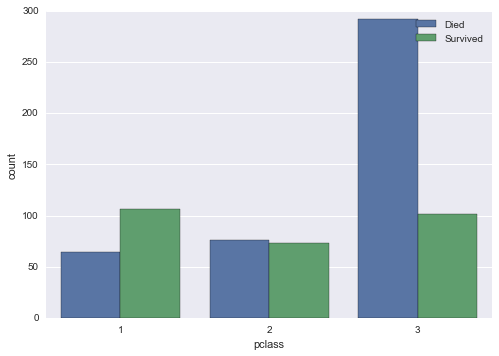

In [4]:
sns.countplot(x_train['pclass'], hue=y_train.survived)
plt.legend(labels=['Died', 'Survived'])
plt.show()

Ut ifra dette, ser det ut til at klassen menneskene var passasjerer på, har innvirkning på om de overlevde eller ikke. Særlig når det gjelder tredje klasse. Vi prøver derfor å predikere overlevelse basert på klassen.

Confusion matrix, without normalization


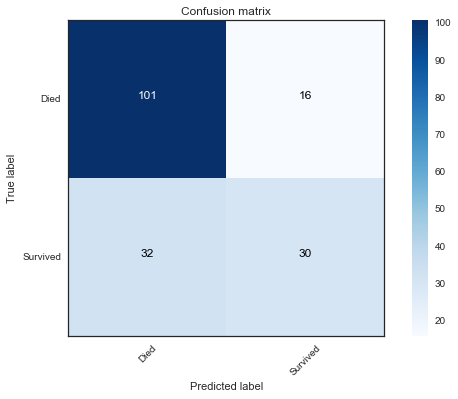

Accuracy:  73.1843575419 %


(array([[101,  16],
        [ 32,  30]]), 0.73184357541899436)

In [6]:
relevant_variables = ['pclass']

tree = DecisionTreeClassifier()
tree.fit(x_train[relevant_variables], y_train)

tester.test_classifier(tree, class_names=['Died', 'Survived'], features=relevant_variables)

# Videre undersøkning av datasettet

Det kan hende at det er flere variable som er viktige. Vi ser derfor på de andre variablenes innvirkning på overlevelse

## Variablene plottet mot overlevelse

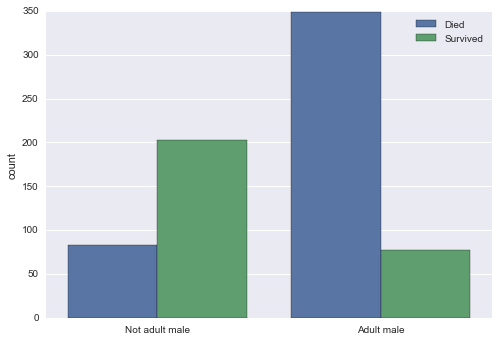

In [8]:
ax = sns.countplot(x_train.adult_male, hue=y_train.survived)
ax.set_xticklabels(['Not adult male', 'Adult male'])
l = plt.legend(labels=['Died', 'Survived'])
plt.xlabel('')
plt.show()

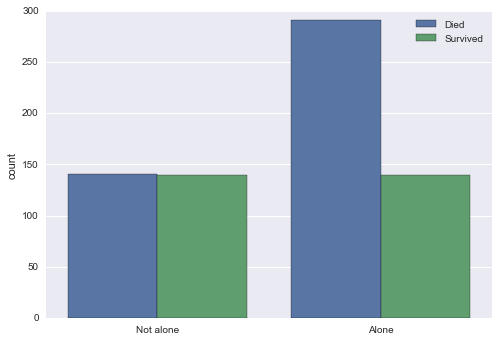

In [10]:
ax = sns.countplot(x_train.alone, hue=y_train.survived)
ax.set_xticklabels(['Not alone', 'Alone'])
l = plt.legend(labels=['Died', 'Survived'])
plt.xlabel('')
plt.show()

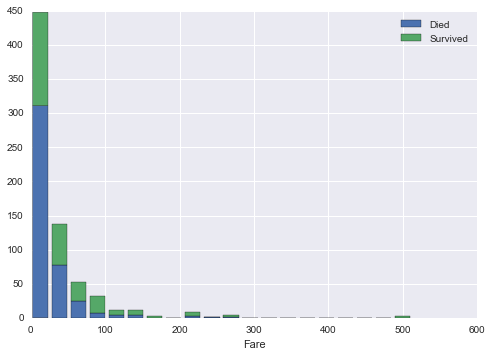

In [11]:
plt.hist([died.fare, survived.fare], stacked=True, bins=20, label=['Died', 'Survived'])
plt.xlabel('Fare')
plt.legend()
plt.show()

## Oppgave 1
Tolk kort plottene ovenfor. Er det noen av de andre variablene som ser viktige ut?

Er det noen som ikke ser viktige ut?

## Oppgave 2: Kan vi gjøre det bedre?
Ut ifra oppgave 1 har du forhåpentligvis en anelse om hvilke variabler som er viktige.
Prøv forskjellige kombinasjoner av variablene, og se hvor høy du kan få accuracy.

Variablene velger du ved å skrive de inn i listen `relevant_variables`

In [1]:
relevant_variables = []

tree = DecisionTreeClassifier()
tree.fit(x_train[relevant_variables], y_train)

cnf_mat, acc = tester.test_classifier(tree, class_names=['Died', 'Survived'], features=relevant_variables)

NameError: name 'DecisionTreeClassifier' is not defined